In [2]:
import numpy as np
import pylab as pl
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
fareData = np.load("MTA_Fare.npy")

In [5]:
type(fareData)

numpy.ndarray

In [6]:
print fareData.shape

(600, 23, 194)


In [7]:
ridetype = np.array(['10t', '14d', '1d', '2t', '30d', '7d', 'ada', 'afas', 'exp','ez',
            'ff','mc','mr','month','rfm','rr','sen','spec','tcmc','t',
            'umlim','xbus','stud'])

In [8]:
fareDataClean = np.where(fareData != -1, fareData,float('NaN'))
fareDataClean.shape

(600, 23, 194)

In [9]:
#fareData[0][0]
#fareDataClean[0][0]

In [10]:
allStations = np.nansum(fareDataClean, axis = 0)
allRideTypes = np.nansum(fareDataClean, axis = 1)
allData = np.nansum(allRideTypes, axis = 0)
print allStations.shape, allRideTypes.shape, allData.shape

(23, 194) (600, 194) (194,)


In [11]:
dateRange = pd.date_range('05/21/2010',periods=194,freq='W')
#dateRange.shape

#Task 1: Event Detection with Threshold

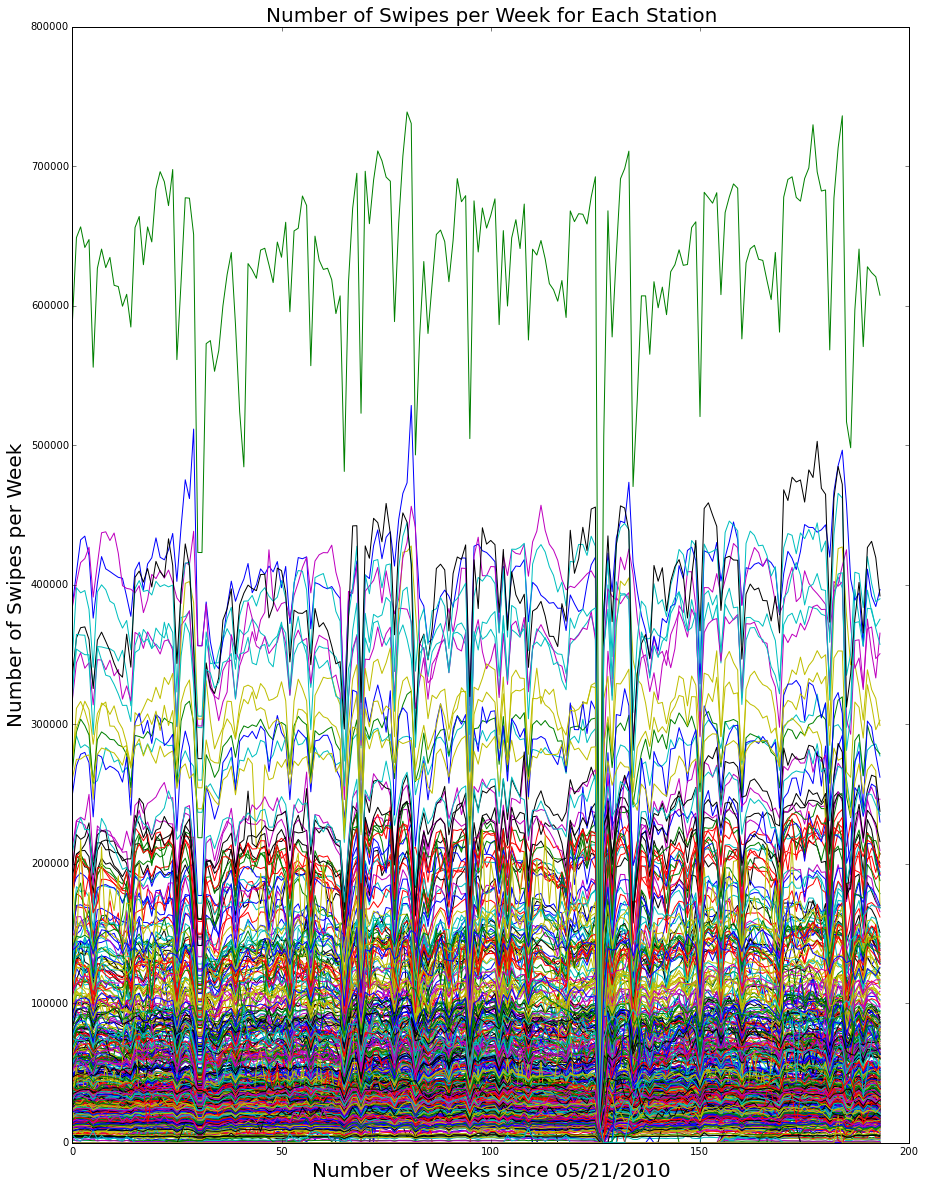

In [12]:
plt.figure(figsize=(15,20))
plt.plot(np.transpose(allRideTypes))
plt.ylabel('Number of Swipes per Week',size=20)
plt.xlabel('Number of Weeks since 05/21/2010',size=20)
plt.title('Number of Swipes per Week for Each Station',size=20)

In [13]:
stationMean = np.nanmean(allRideTypes, axis = 1)
stationStDev = np.nanstd(allRideTypes, axis = 1)
thresholds = [stationMean - 3*stationStDev, stationMean + 3*stationStDev]
#print stationMean, stationStDev, thresholds

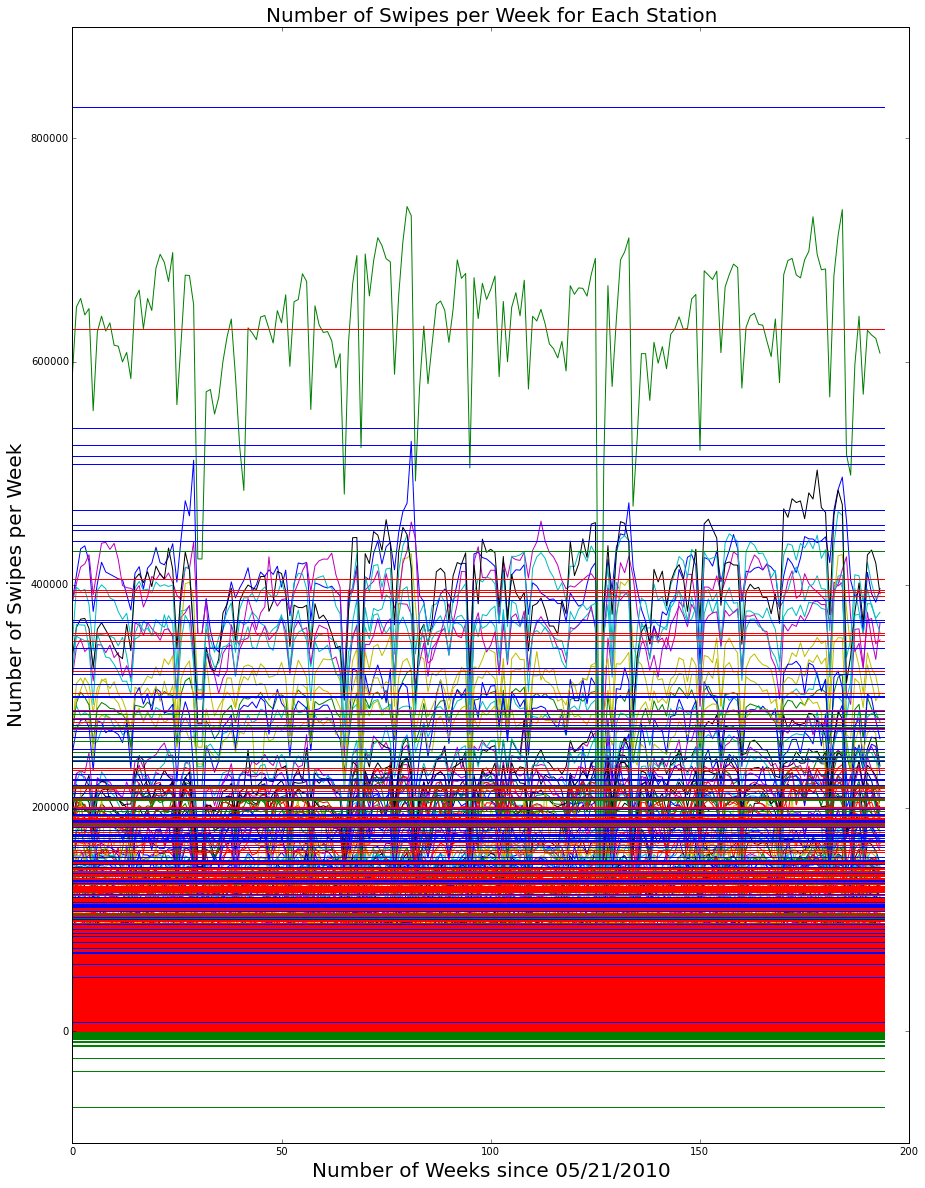

In [14]:
plt.figure(figsize=(15,20))
plt.plot(np.transpose(allRideTypes))
plt.plot([0,194],[thresholds[0],thresholds[0]],'g-')
plt.plot([0,194],[thresholds[1],thresholds[1]],'b-')
plt.plot([0,194],[stationMean,stationMean],'r-')
plt.ylabel('Number of Swipes per Week',size=20)
plt.xlabel('Number of Weeks since 05/21/2010',size=20)
plt.title('Number of Swipes per Week for Each Station',size=20)

In [15]:
print allRideTypes[0][0]
print thresholds[0][0]
print thresholds[1][0]

if allRideTypes[0][0] > thresholds[1][0] or allRideTypes[0][0] < thresholds[0][0]:
    print "Abnormal"
else:
    print "normal"
    

126878.0
8365.4939045
230396.44424
normal


Outlier of 5218686.0 swipes at week 126


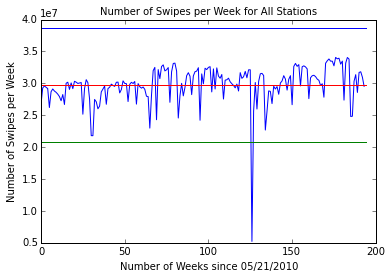

In [16]:
#Let's keep this easy and use the sum of all data

plt.plot(allData)
plt.ylabel('Number of Swipes per Week',size=10)
plt.xlabel('Number of Weeks since 05/21/2010',size=10)
plt.title('Number of Swipes per Week for All Stations',size=10)

allMean = np.nanmean(allData)
allStDev = np.nanstd(allData)
allThreshold = [allMean - 3*allStDev, allMean + 3*allStDev]

plt.plot([0,194],[allThreshold[0],allThreshold[0]],'g-')
plt.plot([0,194],[allThreshold[1],allThreshold[1]],'b-')
plt.plot([0,194],[allMean,allMean],'r-')


print "Outlier of {0} swipes at week {1}".format(str(allData[np.where(allData<allThreshold[0])][0]),np.where(allData<allThreshold[0])[0][0])

This outlier at week 126 is due to Hurricane Sandy

##Task 2: Find non-stationary data in ridership types

In [17]:
allStations.shape

(23, 194)

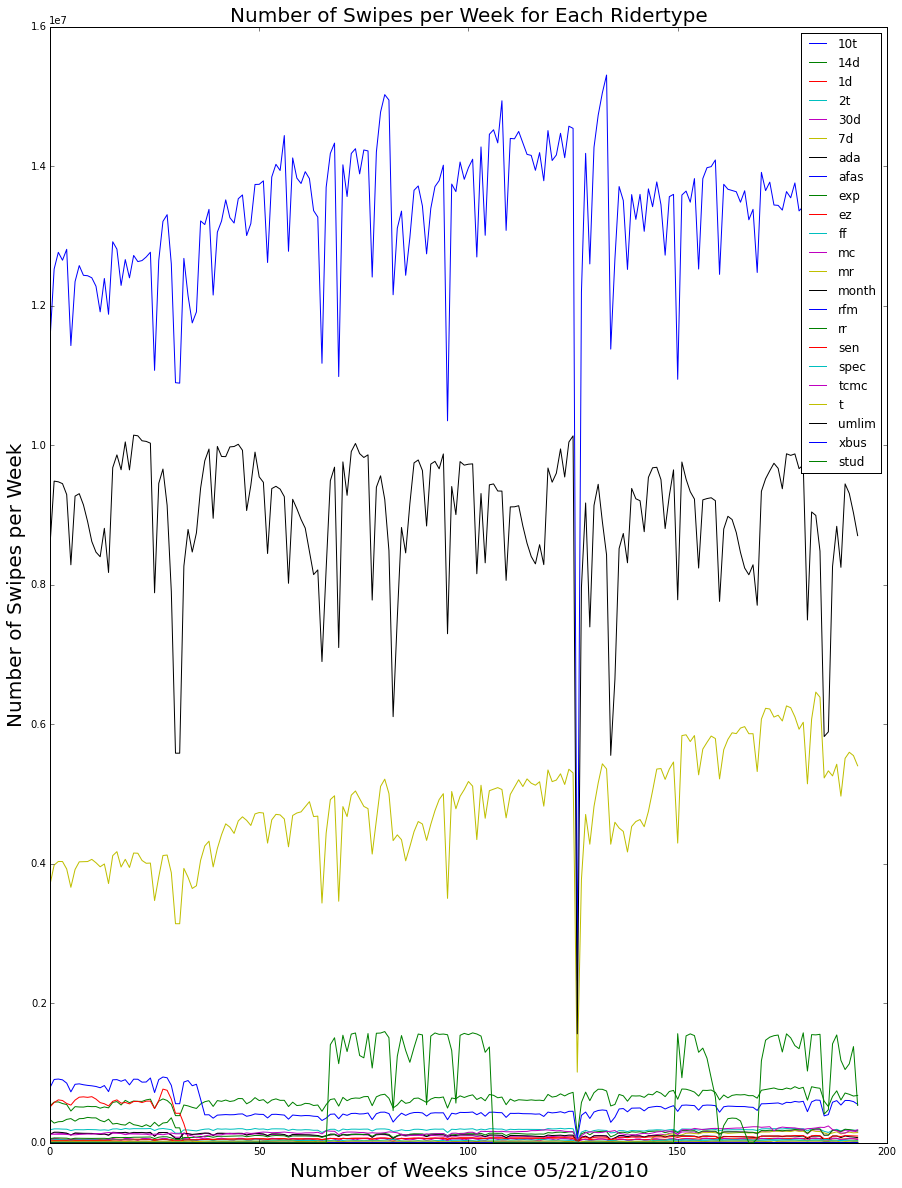

In [18]:
plt.figure(figsize=(15,20))
plt.plot(np.transpose(allStations))

#thresholds 

#plt.plot([0,194],[thresholds[0],thresholds[0]],'g-')
#plt.plot([0,194],[thresholds[1],thresholds[1]],'b-')
#plt.plot([0,194],[stationMean,stationMean],'r-')
plt.ylabel('Number of Swipes per Week',size=20)
plt.xlabel('Number of Weeks since 05/21/2010',size=20)
plt.title('Number of Swipes per Week for Each Ridertype',size=20)
plt.legend(ridetype)

/Users/michelleho/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


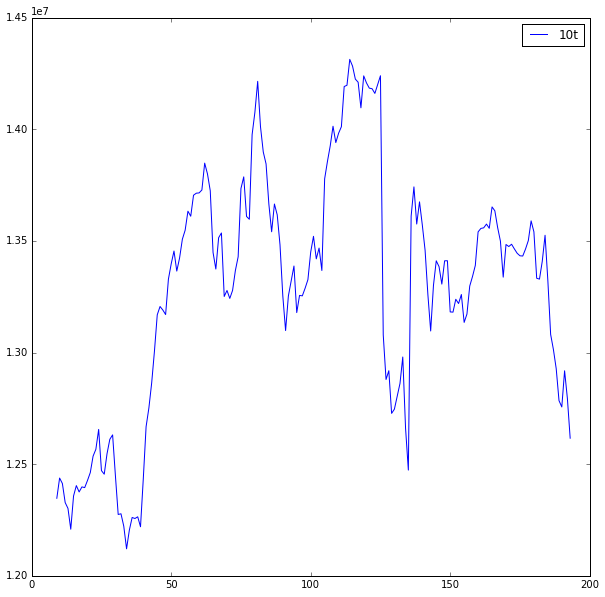

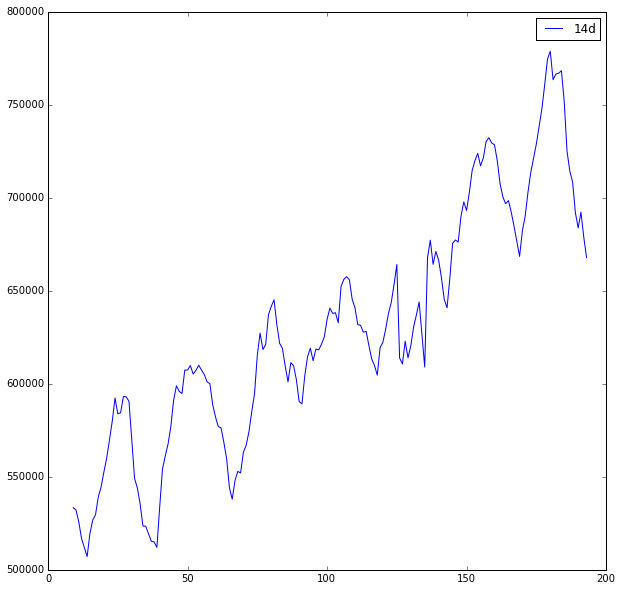

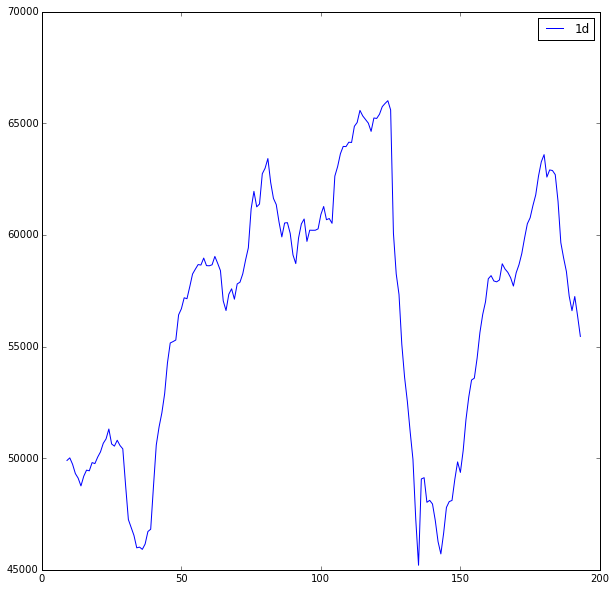

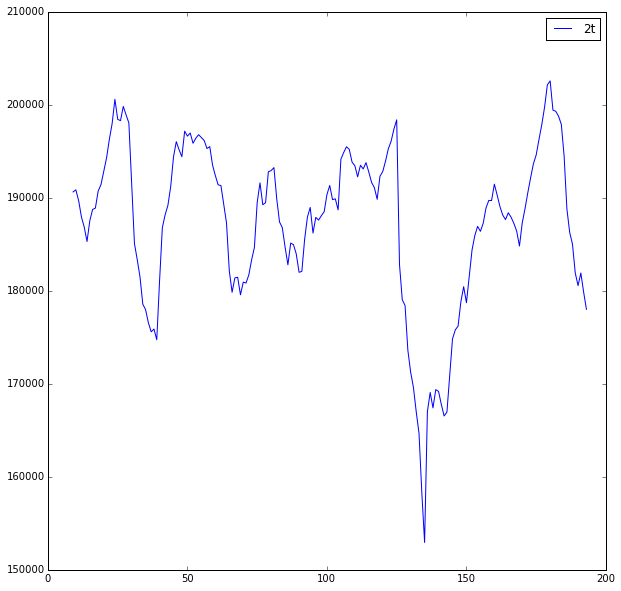

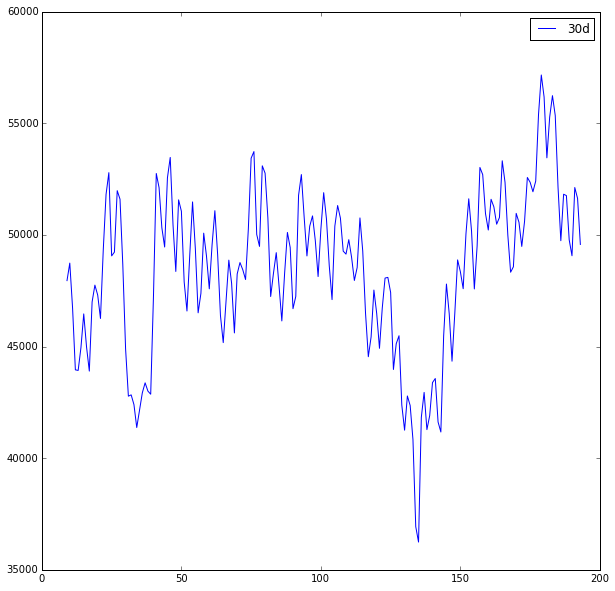

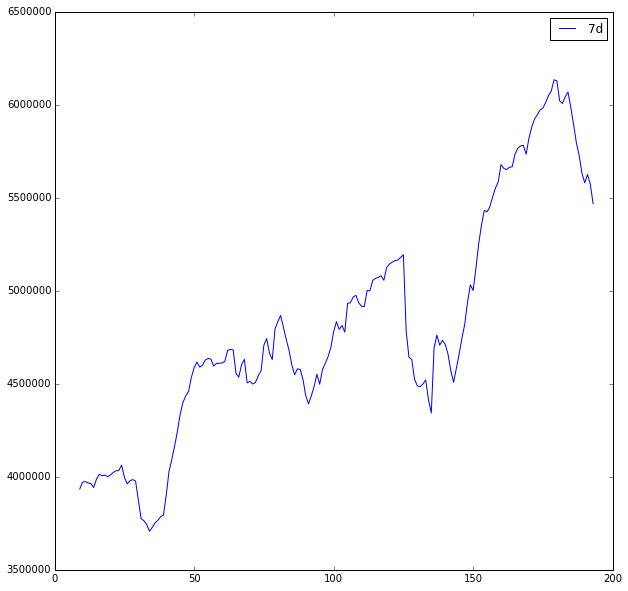

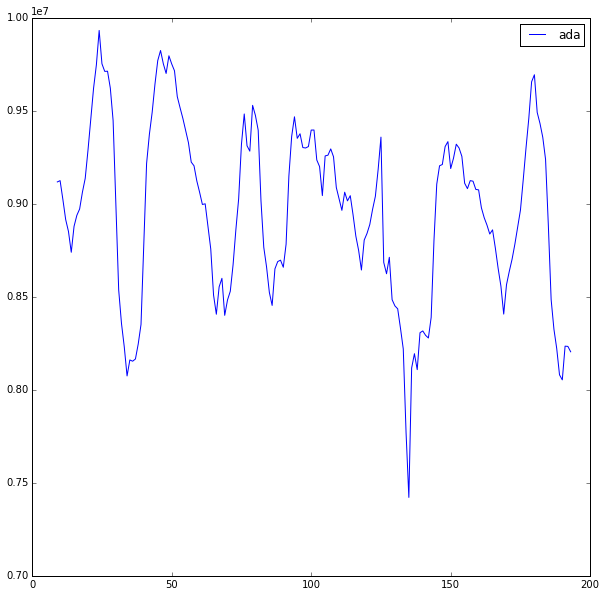

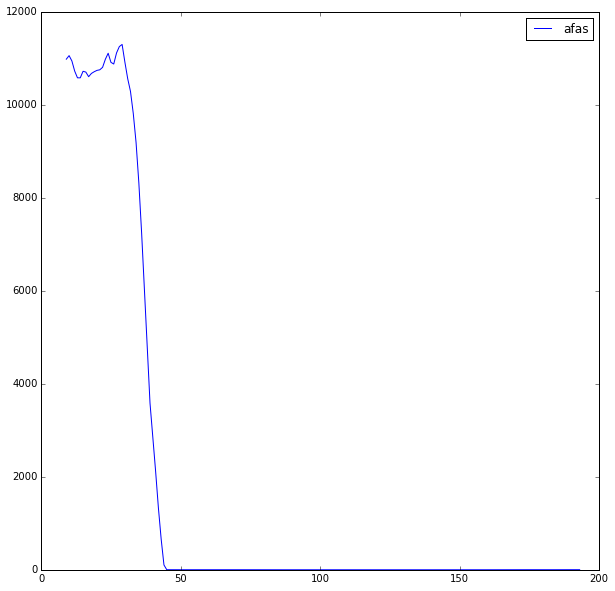

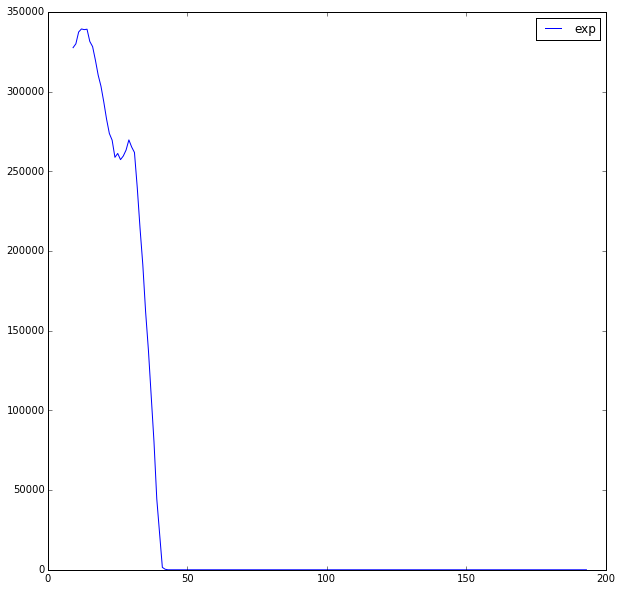

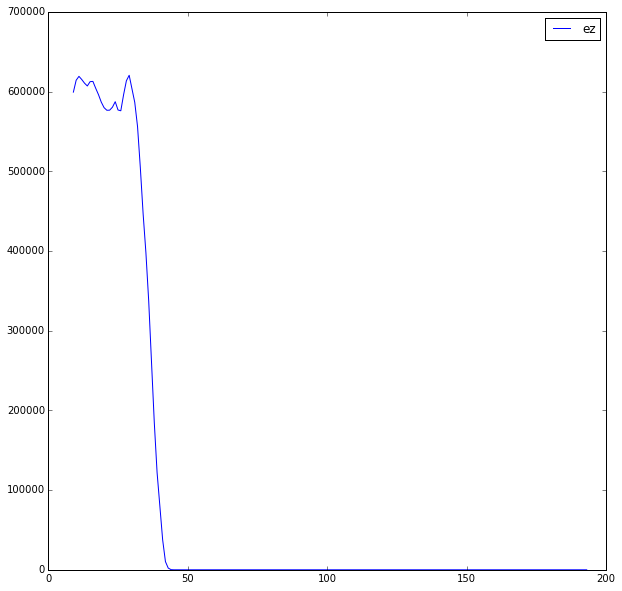

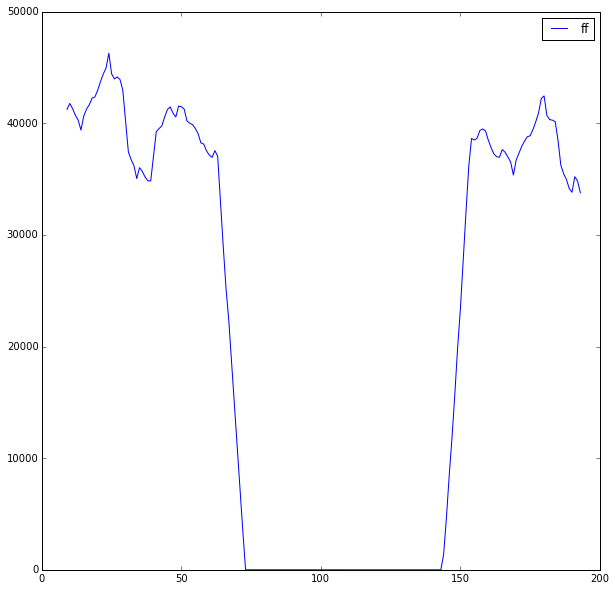

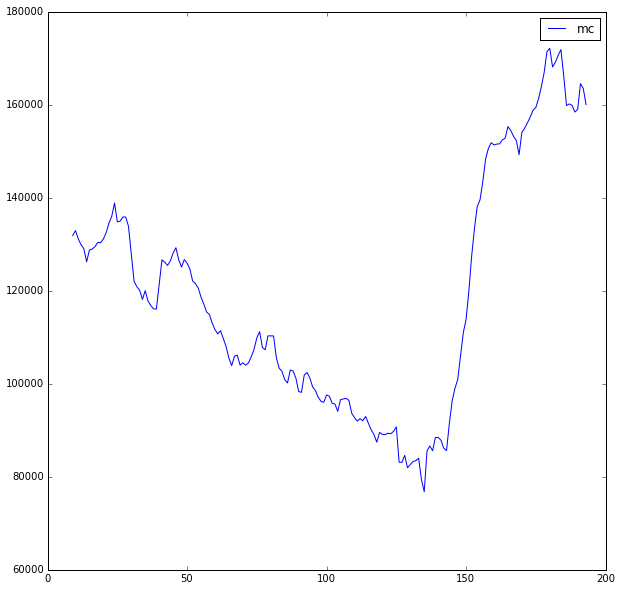

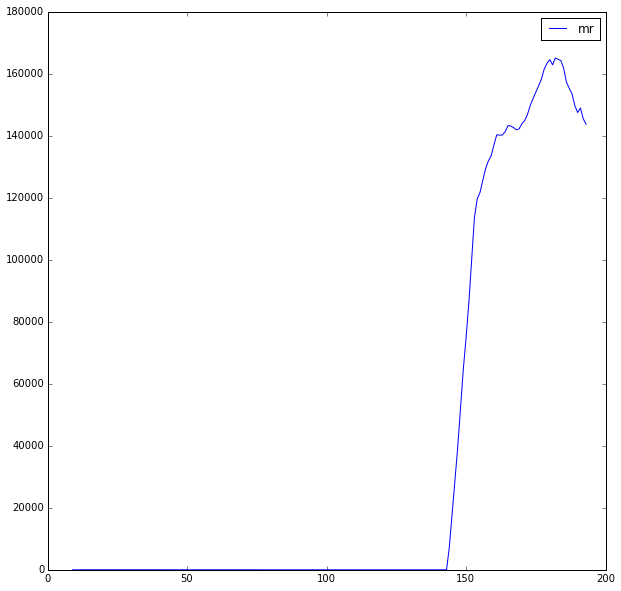

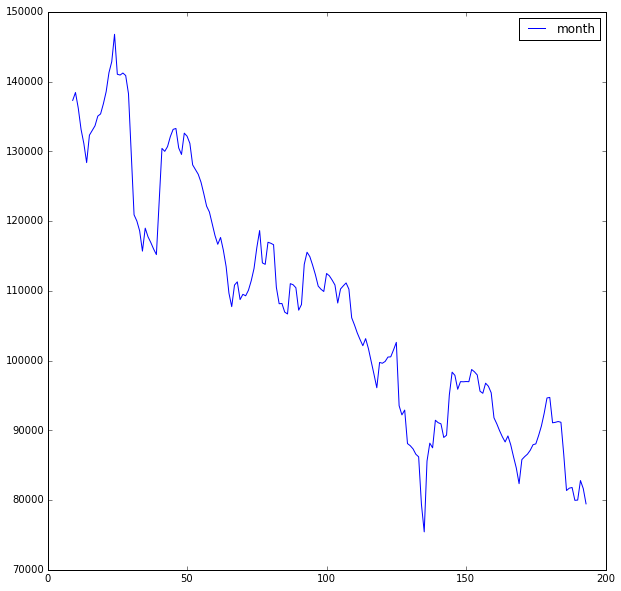

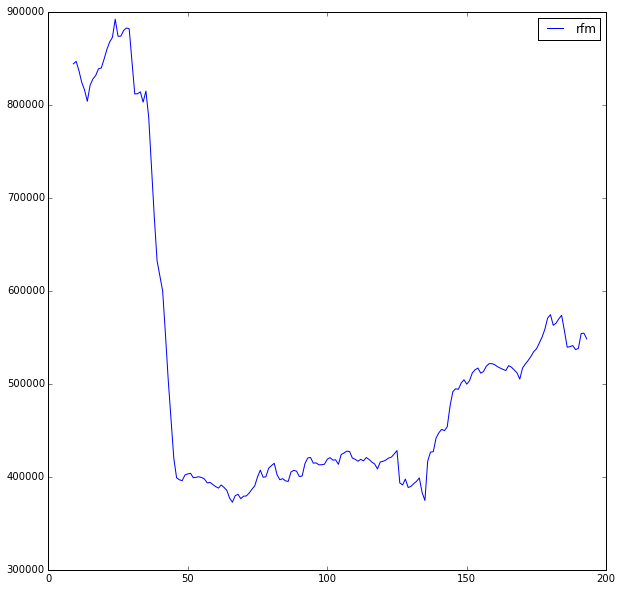

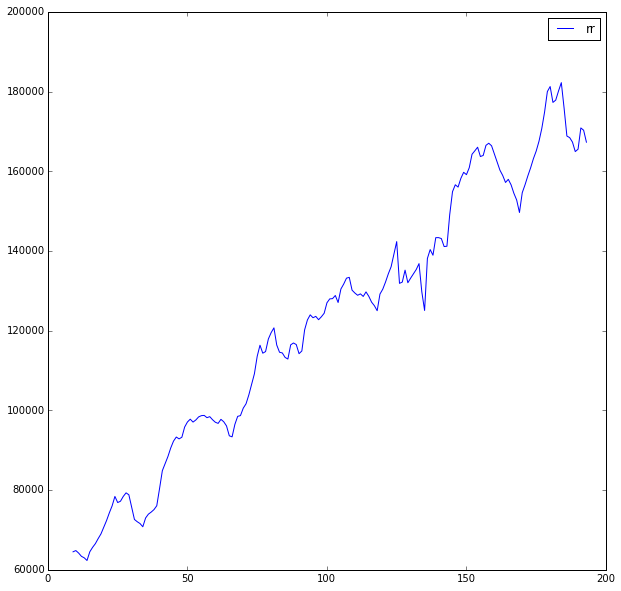

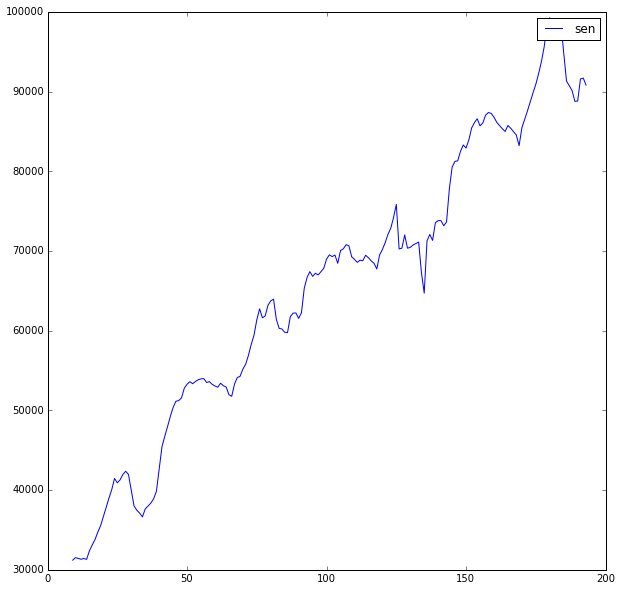

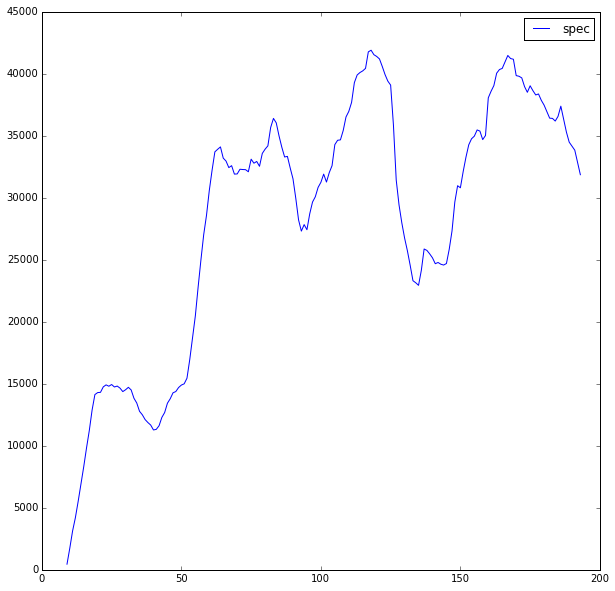

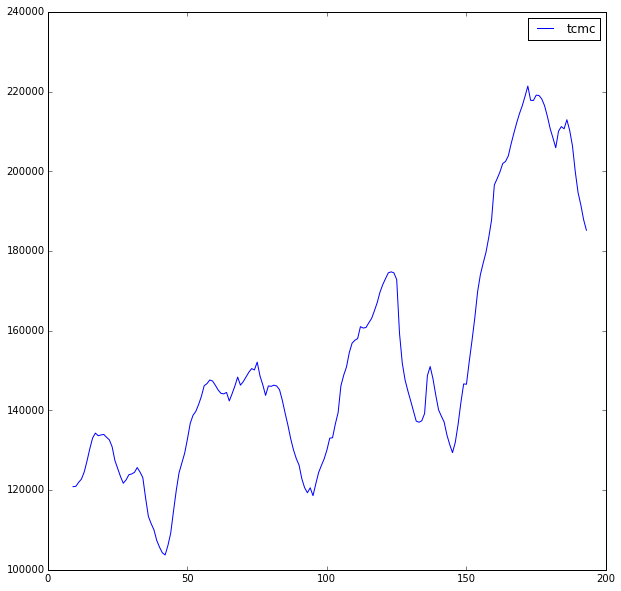

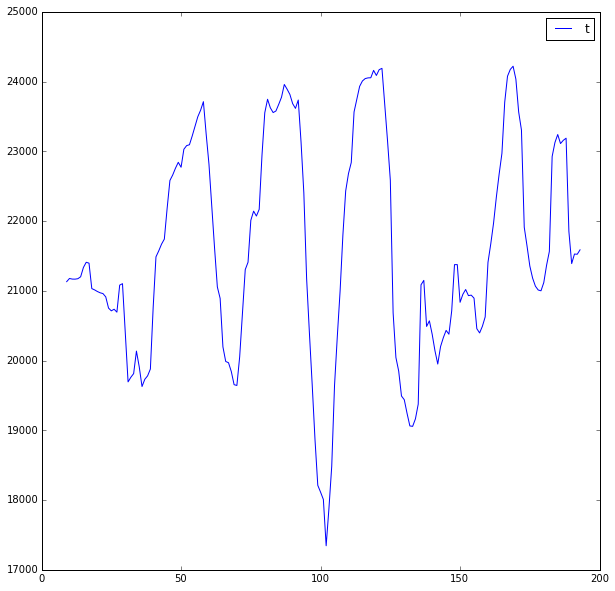

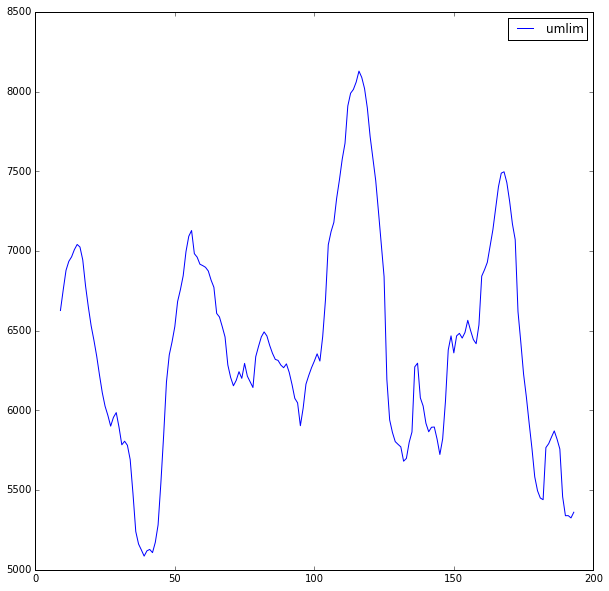

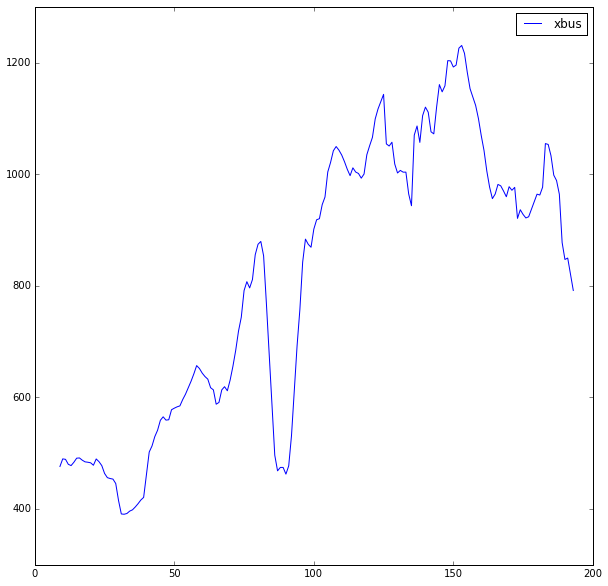

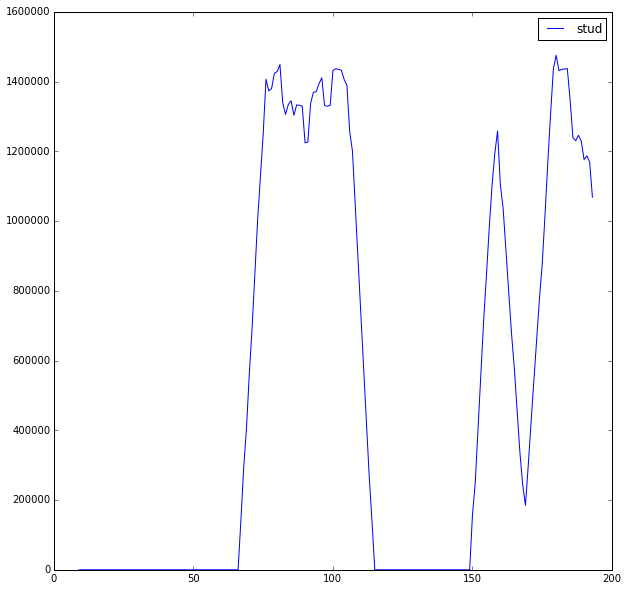

In [19]:
rollingMeans = pd.rolling_mean(np.transpose(allStations),10)

for i in range(0,23):
    fig = plt.figure(figsize=(10,10))
    ax = plt.plot(np.transpose(rollingMeans)[i])
    plt.legend(ridetype[i:])
#for i in range (8,16):
        #ax = fig.add_subplot(3,8,i)
        #ax = plt.plot(np.transpose(rollingMeans)[i])
        #plt.legend(ridetype)
#for i in range (16,23):
        #ax = fig.add_subplot(3,8,i)
        #ax = plt.plot(np.transpose(rollingMeans)[i])
        #plt.legend(ridetype)
    #plt.ylabel('Rolling Mean of Swipes per Week',size=20)
    #plt.xlabel('Number of Weeks since 05/21/2010',size=20)
#pd.rolling_std(np.transpose(allStations),10)
#plt.figure(figsize=(15,20))


From visual inspection of the rolling mean, it appears that 14-day, 7-day, RR, senior ride types show an increasing trend.

AFAS, EXP, EZ, Month ride types show a decreasing trend.

In [20]:
for i, n in enumerate(ridetype):
    print n, 'P-value: {0:.2f}'.format(sm.tsa.adfuller(allStations[i])[1])

10t P-value: 0.00
14d P-value: 0.22
1d P-value: 0.23
2t P-value: 0.00
30d P-value: 0.00
7d P-value: 0.53
ada P-value: 0.00
afas P-value: 0.09
exp P-value: 0.03
ez P-value: 0.12
ff P-value: 0.54
mc P-value: 0.87
mr P-value: 0.93
month P-value: 0.55
rfm P-value: 0.23
rr P-value: 0.76
sen P-value: 0.74
spec P-value: 0.07
tcmc P-value: 0.04
t P-value: 0.00
umlim P-value: 0.00
xbus P-value: 0.38
stud P-value: 0.05


If we chose a significance level of 0.5, then we fail to reject the null hypothesis that 7d, ff, mc, mr, month, rr, and sen rider types have a unit root, meaning that these rider types are non-stationary.

Let's now determine the ratio of usage in the first 10 and last 10 weeks.

In [21]:
#print rollingMeans[9]
ratios = rollingMeans[-1]/rollingMeans[9]
for i,n in enumerate(ridetype):
    print n, ratios[i]

10t 1.02179792595
14d 1.25206505277
1d 1.11134513987
2t 0.933803359956
30d 1.03378708071
7d 1.38974760362
ada 0.899841341519
afas 0.000209446968938
exp 1.06870326904e-05
ez 1.50195579677e-06
ff 0.818802130171
mc 1.213540557
mr 24784.9310345
month 0.578722384564
rfm 0.649608431376
rr 2.59295988592
sen 2.90939676884
spec 70.1823788546
tcmc 1.5322710627
t 1.02158903228
umlim 0.809063881804
xbus 1.66232675346
stud inf


Those rider types with ratio greater than 1 AND an AD Fuller statistic that indicates non-stationary data have an increasing trend.

Those rider types with ratio less than 1 AND an AD Fuller statistic that indicates non-stationary data have a decreasing trend.

In [22]:
for i,n in enumerate(ridetype):
    if ratios[i]>1 and sm.tsa.adfuller(allStations[i])[1]>.5:
        print n, 'exhibits increasing trend'
    if ratios[i]<1 and sm.tsa.adfuller(allStations[i])[1]>.5:
        print n, 'exhibits decreasing trend'

7d exhibits increasing trend
ff exhibits decreasing trend
mc exhibits increasing trend
mr exhibits increasing trend
month exhibits decreasing trend
rr exhibits increasing trend
sen exhibits increasing trend


##Task Three: Periodicity (Fourier)

In [23]:
allRideTypes.shape

(600, 194)

/Users/michelleho/anaconda/lib/python2.7/site-packages/numpy/core/numeric.py:462: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


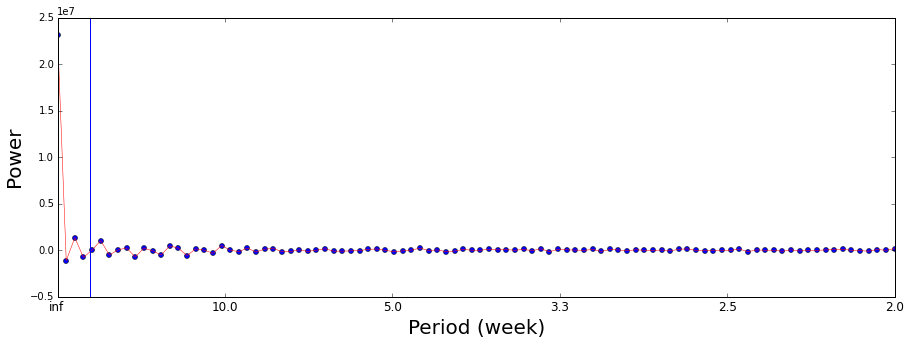

In [24]:
f = np.fft.rfft(allRideTypes[0])
#print f
N = allRideTypes.shape[1]
#print N
fig=pl.figure(figsize=(15,5))
ax=fig.add_subplot(111)
ax.plot(np.fft.rfftfreq(N, 1.0), f, 'o', ms=5)
ax.plot(np.fft.rfftfreq(N, 1.0), f, 'r-', lw=.5)

ax.set_xticklabels([ "{:.1f}".format(1/f) for f in ax.get_xticks()], fontsize=12)
plt.xlabel("Period (week)", fontsize=20)
plt.ylabel("Power", fontsize=20)
plt.axvline(1.0/52)

The above is an example for one station (station 0). Let's do it for all stations and find the powers that happen in the fourth power point.

In [29]:
for i,n in enumerate(allRideTypes):
    f = np.fft.rfft(allRideTypes[i])
    N = allRideTypes.shape[1]
    annualPower = f[3]
    print i, annualPower


0 (-766606.54751+497326.275512j)
1 (-59877.7030842-469120.66122j)
2 (-22531.461365-4520.85282787j)
3 (-77601.9290321-9794.879344j)
4 (-65593.2026808+6892.24656299j)
5 (-66132.4388815+27493.598108j)
6 (-36268.5593548-4183.23894856j)
7 (-56851.2499239-13665.2706668j)
8 (-35946.6382456+19648.2377681j)
9 (-275991.736492+1276290.92558j)
10 (-415710.145236+232311.948204j)
11 (-460656.95501+153358.78782j)
12 (-154052.369918+87005.6521544j)
13 (-292538.691372+184932.247697j)
14 (-357816.116212+179371.122239j)
15 (-50465.726327-11294.1382078j)
16 (-135243.110445+484946.02597j)
17 (-852590.331222+243195.029612j)
18 (-141262.641698-470.742593654j)
19 (-252948.711867-268344.671638j)
20 (-202331.996713+380076.831757j)
21 (-496179.263748-216425.099985j)
22 (-357392.820294+2476.07390223j)
23 (-203112.982901+248771.308691j)
24 (-383257.645242+115569.8493j)
25 (0.976480928358-0.450503540095j)
26 (-352292.792437+408271.512935j)
27 (-266736.234238+1087080.13672j)
28 (-426701.058711+502727.81669j)
29 (-37